# Part I - (Ford GoBike System Data)
## by (OKWECHIME DENNIS)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area , the dataset consists of 183,412 rows and 16 columns. the columns are namely ( duration_sec, start_time, end_time, start_station_is, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)




## Preliminary Wrangling


In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:


# load the dataset using the pandas read csv
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)



,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB




    The data is untidy 
    The data is not of enough quality
    columns with wrong data types
    presence of null values in the dataset



In [7]:
#drop the null values and piping it into a new dataframe
df_clean = df
df_clean.dropna(inplace = True)

In [8]:
# change the datatypes of the columns
# change the start and end time to date time format
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])







In [9]:
#convert the start , bike and end station id to string format
df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')
df_clean['bike_id'] = df_clean['bike_id'].astype('str')

In [10]:
# convert the columns to category data type
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')

In [11]:
# convert column to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)



TEST (to confirm the data is now clean)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
dtypes: category(3), datetime64[ns](2), float64(4), int64(2), obj

In [15]:
# creating a age column by substracting the birth year from the present date
now = datetime.datetime.now().year
df_clean['age'] = now - df_clean['member_birth_year']



In [16]:
# checking for the new changes
df_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,39
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,51
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,34
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,49
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,64


In [17]:
# create the year , month and day of week column from the start time column
df_clean['start_year'] = pd.to_datetime(df_clean['start_time']).dt.strftime('%Y')
df_clean['start_month'] = pd.to_datetime(df_clean['start_time']).dt.strftime('%B')
df_clean['start_day_of_week'] = pd.to_datetime(df_clean['start_time']).dt.strftime('%A')






In [18]:
#create the start and end hour of the day column from the start and end time columns
df_clean['start_hour_of_day'] = df_clean['start_time'].dt.strftime('%I %p')
df_clean['end_hour_of_day'] = df_clean['end_time'].dt.strftime('%I %p')


In [19]:
df_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_year,start_month,start_day_of_week,start_hour_of_day,end_hour_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,39,2019,February,Thursday,05 PM,08 AM
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,51,2019,February,Thursday,12 PM,05 AM
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,34,2019,February,Thursday,05 PM,04 AM
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,49,2019,February,Thursday,11 PM,12 AM
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,64,2019,February,Thursday,11 PM,12 AM


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
age                        174952 non-null int64
start_year      

In [21]:
df_clean['start_month']

0         February
2         February
3         February
4         February
5         February
6         February
7         February
8         February
9         February
10        February
11        February
12        February
14        February
15        February
16        February
17        February
18        February
19        February
20        February
21        February
22        February
23        February
24        February
25        February
26        February
27        February
29        February
30        February
31        February
32        February
            ...   
183381    February
183382    February
183383    February
183384    February
183385    February
183386    February
183387    February
183388    February
183389    February
183390    February
183391    February
183392    February
183393    February
183394    February
183395    February
183396    February
183397    February
183398    February
183399    February
183400    February
183401    February
183403    Fe

In [23]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,38.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,22.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,31.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,36.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,43.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,145.000000


### What is the structure of your dataset?

> This dataset, which has 174,192 rows and 16 columns, contains details about each unique trip taken in a bike-sharing system serving the greater San Francisco Bay area. The columns include ( duration_sec, start_time, end_time, start_station_is, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, age)

### What is/are the main feature(s) of interest in your dataset?

> 

    When are most trips taken in terms of time of day, day of the week?

    How long does the average trip take?

    Does the time an average trip take depend on if a user is a subscriber or customer?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 
    The duration of the rides taken by riders.
    The relationship between the user type and the number of rides taken


## Univariate Exploration




In [24]:
# set defined color for plots
basecolor = sb.color_palette()[0]
hour_order = ['12 AM','01 AM','02 AM','03 AM','04 AM','05 AM','06 AM','07 AM','08 AM','09 AM','10 AM','11 AM',
         '12 PM','01 PM','02 PM','03 PM','04 PM','05 PM','06 PM','07 PM','08 PM','09 PM','10 PM','11 PM']
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


In [25]:
# define the function to aid easy creation of multiple count plots 
def plotcount(df, xVar,color = basecolor, order = None, figsize=[14,6]):
    '''
    docstring: the function returns a seaborn countplot well titled and labelled.
    input : it takes in the dataframe and the variable on the xaxis as well as any other needed arguments
    output : a count plot
    '''
    #the plot
    sb.countplot(data = df , x = xVar, edgecolor = 'black', color = color, order = order);
    # extract the name of the variable to a format suited for a title
    xVar=xVar.replace('_',' ')
    # format the chart title and labels
    plt.title(f''' Distribution of {xVar}'''.title(),fontsize = 14, weight = 'bold')
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')


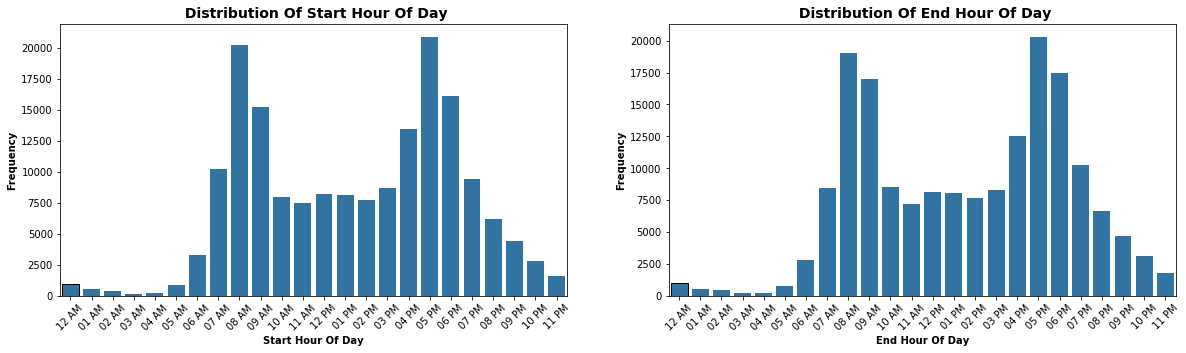

In [26]:
plt.figure(figsize = [20,5])
# charting the trip start hours on a bar
plt.subplot(1,2,1)

plotcount(df_clean, 'start_hour_of_day', order = hour_order, figsize = None)
plt.xticks(rotation = 45)

#charting the trips end hours on a bar 
plt.subplot(1,2,2)
plotcount(df_clean, 'end_hour_of_day', order = hour_order, figsize = None)
plt.xticks(rotation = 45);

The distribution of journeys by time of day revealed that 8 am and 5 pm saw the highest number of trips taken on the platform and the highest number of excursions terminating during those hours.

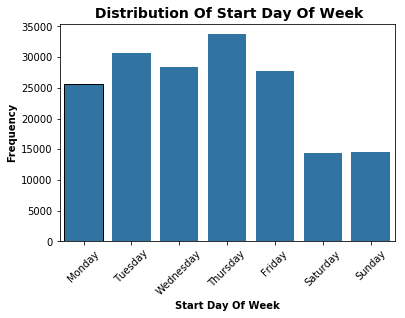

In [27]:
# distribution of the trips by the weekday in a chart
plotcount(df_clean, 'start_day_of_week', color = basecolor, order = weekday)
plt.xticks(rotation = 45);

We can see an increase from monday through to thursday when we have the peak of the week and then slow descrease from friday till the weekend

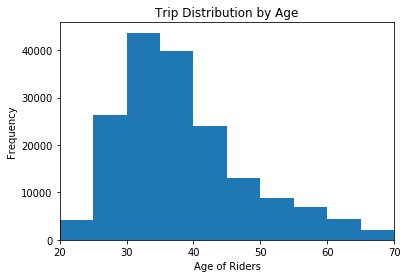

In [28]:
#charting the age distribution on a standard scale
binsize = 5
bins = np.arange(20, df_clean['age'].max()+binsize, binsize)
plt.hist(data = df_clean, x = 'age', bins = bins)
plt.title('Trip Distribution by Age')
plt.xticks([20,30,40,50,60,70,80])
plt.xlim([20,70])
plt.xlabel('Age of Riders')
plt.ylabel('Frequency');

 Charting the trip duration by age on a standard scaled histogram showed a highly left skewed distribution.The distribution is unimodal having a peak for riders between the ages of 30 to 40 years


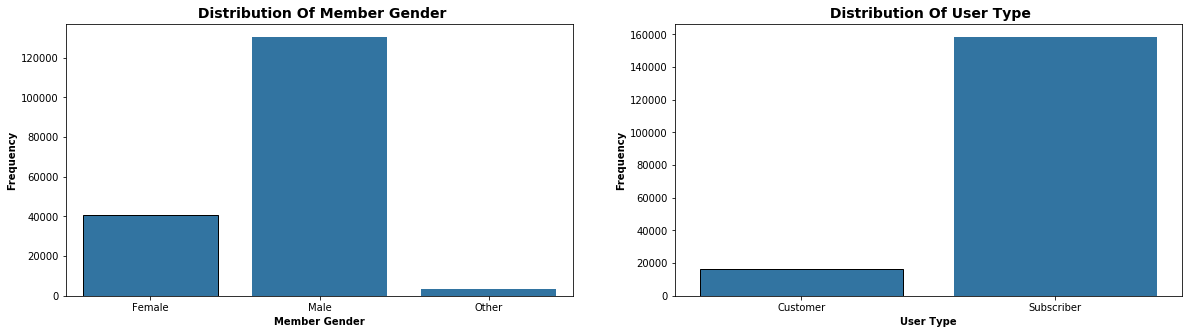

In [29]:
#charting the distribution of trips based on gender
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
plotcount(df_clean, 'member_gender', color = basecolor, figsize = None)
#charting of trips based on membership type
plt.subplot(1,2,2)
plotcount(df_clean, 'user_type', color = basecolor, figsize = None);



1- Male riders make up the majority of bike rides on the platform, followed by female riders, with other genders making up the least of the dataset, according to the graphic.

2- From the image, it can be inferred that members take the majority of the rides, compared to casual consumers who take the minority of rides.

3- Considering the link between the day of the week and the hour when members and casual begin their journeys in the future.



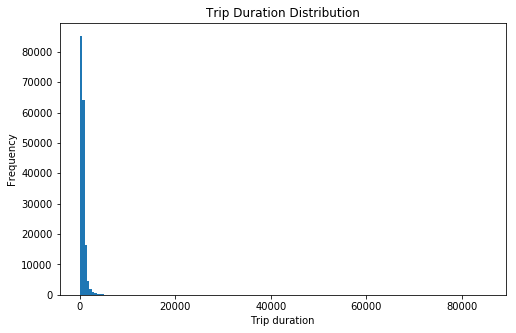

In [30]:
binsize = 500
plt.figure(figsize = [8,5])
bins = np.arange(0, df_clean['duration_sec'].max()+binsize, binsize)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Trip Duration Distribution')
plt.xlabel('Trip duration')
plt.ylabel('Frequency');

The visual shows a highly left skewed distribution when charted on the standard scale to obtain more insights, normalizing the distribution using scale transaformation becomes imperative.




In [31]:
#taking a log of the decription of the dataset
np.log10(df_clean.describe())


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,age
count,5.242919,5.242919,5.242919,5.242919,5.242919,5.242919,5.242919
mean,2.847574,1.577161,NaN,1.577163,NaN,3.297717,1.582028
std,3.215427,-0.998305,-0.929106,-0.998719,-0.930723,1.005126,1.005126
min,1.785330,1.571910,NaN,1.571910,NaN,3.273696,1.342423
25%,2.509203,1.577152,NaN,1.577152,NaN,3.296665,1.491362
50%,2.707570,1.577271,NaN,1.577274,NaN,3.298198,1.556303
75%,2.897077,1.577461,NaN,1.577465,NaN,3.299289,1.633468
max,4.927103,1.578413,NaN,1.578413,NaN,3.301247,2.161368


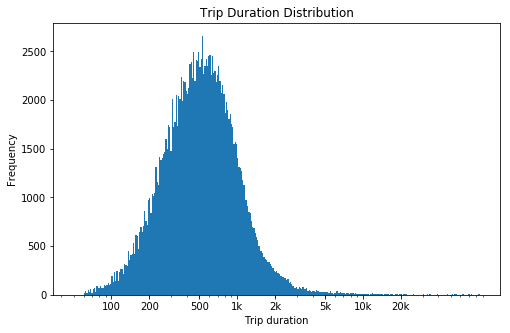

In [32]:
#charting the trip duration on a log scale
logbinsize = 0.01
plt.figure(figsize = [8,5])
bins = 10** np.arange(1.7, np.log10(df_clean['duration_sec'].max())+logbinsize, logbinsize)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([1e2, 2e2, 5e2, 1e3, 2e3, 5e3, 1e4, 2e4], [100, 200, 500, '1k', '2k', '5k', '10k', '20k'])
plt.title('Trip Duration Distribution')
plt.xlabel('Trip duration')
plt.ylabel('Frequency');

From the visual it can be deduced that a bulk of the trips lasted between 100 secc to 2000 secs with trips peaking around range 300 to 1000 seconds.


500 secs happen to be the singular peak for the distribution



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Charting the trip start time by hour reveals a peak in trips between 7-8 am and another between 5 and 6 pm, the former owing to people leaving work and the latter due to people arriving at work.

The days in the distribution with the fewest trips were Saturday and Sunday, suggesting that maybe riders mostly used their bikes for commuting.


For simpler research, I changed the scale for the trip duration axis to a log scale.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> A left-skewed unimodal distribution with a peak between the ages of 30 and 40 was visible when the age column was mapped.

After a lengthy change, the scale displayed a normal distribution with a 500-second peak when charting the journey time.


I eliminated blank values, modified the data types for several columns, and added new columns like "age," "start hour," and "end hour," among others.

## Bivariate Exploration



In [33]:
# drop non needed rows and columns
df_clean.drop(columns = ['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude'], axis = 1, inplace = True)


In [34]:
df_clean.describe(percentiles = [.99])

,duration_sec,member_birth_year,age
count,174952.000000,174952.000000,174952.000000
mean,704.002744,1984.803135,38.196865
std,1642.204905,10.118731,10.118731
min,61.000000,1878.000000,22.000000
50%,510.000000,1987.000000,36.000000
99%,3176.000000,1999.000000,68.000000
max,84548.000000,2001.000000,145.000000


From the above it can be seen that 99% of all ages lie between the ages of 21 to 67 years.



its safe to say that the 144 year old value is an error as such should be dropped from the dataframe





In [35]:
df_clean.drop(df_clean[df_clean.age > 67].index, inplace = True)

TEST

In [36]:
df_clean.describe()

,duration_sec,member_birth_year,age
count,173138.000000,173138.000000,173138.000000
mean,703.894217,1985.195099,37.804901
std,1647.868715,9.344406,9.344406
min,61.000000,1956.000000,22.000000
25%,323.000000,1980.000000,31.000000
50%,510.000000,1987.000000,36.000000
75%,788.000000,1992.000000,43.000000
max,84548.000000,2001.000000,67.000000


In [37]:
# create column duration in minutes
df_clean['duration_min'] = df_clean['duration_sec']/60



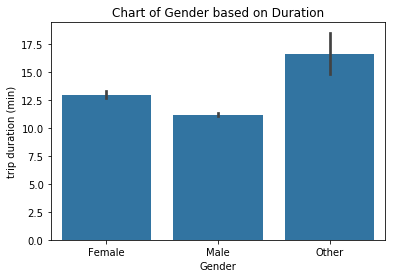

In [38]:
#Relationship between age and gender
sb.barplot(data = df_clean , x = 'member_gender', y = 'duration_min', color = basecolor)
plt.title('Chart of Gender based on Duration')
plt.ylabel('trip duration (min)')
plt.xlabel('Gender');

From the images, it can be inferred that while males made up the majority of passengers on the platform, they also took the shortest excursions, as opposed to females who took longer journeys and other genders who made up the majority of passengers.



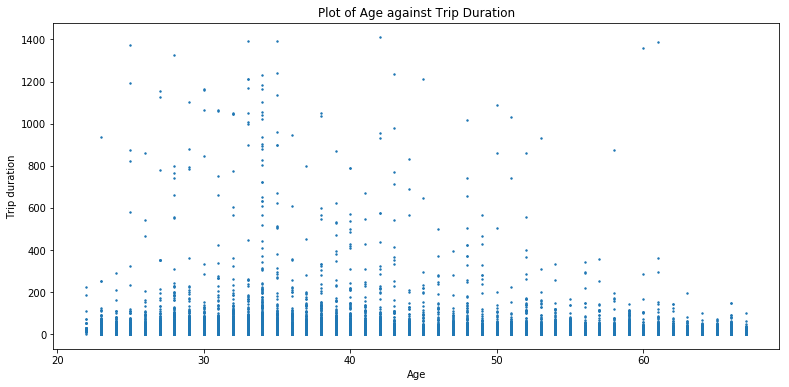

In [39]:
#relationship between age and duration in minutes
plt.figure(figsize = [13,6])
plt.scatter(data = df_clean , x = 'age', y = 'duration_min', s = 2)
plt.title('Plot of Age against Trip Duration')
plt.xlabel('Age')
plt.ylabel('Trip duration');

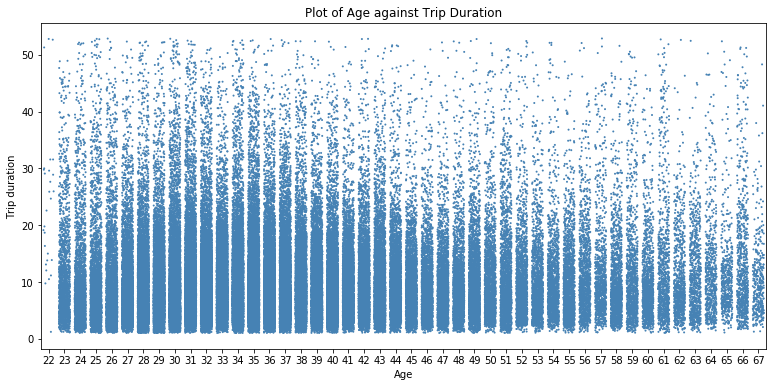

In [40]:
# stripping off the outliers for a more in depth look at the values
plt.figure(figsize = [13,6])
sb.stripplot(data = df_clean.query('duration_min<duration_min.quantile(0.99)') , x = 'age', y = 'duration_min',s = 2,
            color = 'steelblue', jitter = 0.35)
plt.title('Plot of Age against Trip Duration')
plt.xlabel('Age')
plt.ylabel('Trip duration');

Outside a few outliers, it can be deduced that there is a negative correlation between the length of the trips on the platform and the age of the riders, with younger riders more inclined to undertake longer trips as compared to the older riders.





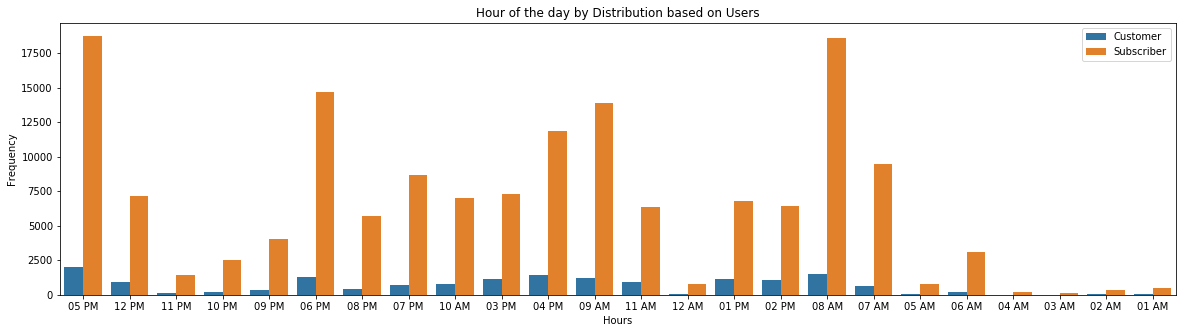

In [52]:
#relationship between start hour and user type
plt.figure(figsize = [20,5])
sb.countplot(data = df_clean , x = 'start_hour_of_day', order = None, hue = 'user_type')
plt.title('Hour of the day by Distribution based on Users')
plt.xlabel('Hours')
plt.legend()
plt.ylabel('Frequency');

Looking at the visuals, it is clear that the demand for platform members increases gradually throughout the day, beginning at 3 a.m., peaking around 8 a.m., then gradually declining until midday, rising again to reach a second high around 5 p.m., and then softly declining to conclude the day. For casual users, demand begins a little later, around 6am, peaked at 8am, dropped gradually about 10am, stayed stable until midday, increased until a second peak at 5pm, and then started to decline to finish the cycle.

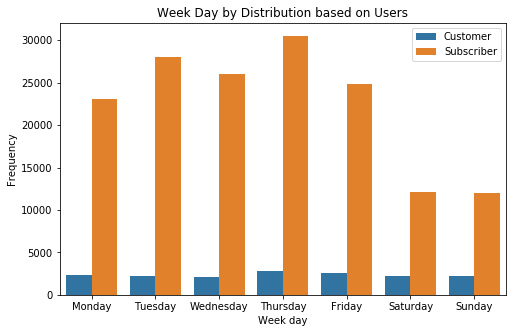

In [53]:
#relationship between day of week and user type
plt.figure(figsize = [8,5])
sb.countplot(data = df_clean , x = 'start_day_of_week', hue = 'user_type', order = weekday)
plt.title('Week Day by Distribution based on Users')
plt.xlabel('Week day')
plt.ylabel('Frequency')
plt.legend();

On the platform, riders' activity is seen to gradually increase starting on Monday, peaking on Thursday, then declining until plateauing around Saturday and Sunday. Except for a little increase in activity on Thursdays, it's more or less even for the casual consumers.

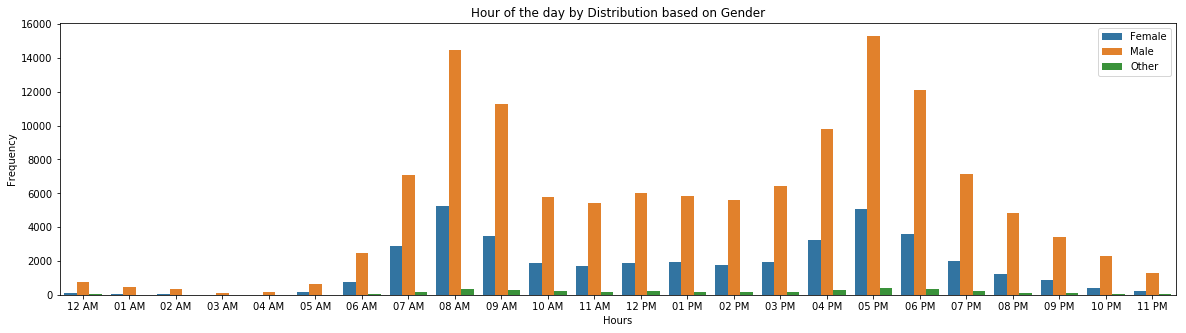

In [54]:
# relationship between hour of day and gender
plt.figure(figsize = [20,5])
order = ['12 AM','01 AM','02 AM','03 AM','04 AM','05 AM','06 AM','07 AM','08 AM','09 AM','10 AM','11 AM','12 PM','01 PM','02 PM','03 PM','04 PM','05 PM','06 PM','07 PM','08 PM','09 PM','10 PM','11 PM']
sb.countplot(data = df_clean , x = 'start_hour_of_day',order = order, hue = 'member_gender')
plt.title('Hour of the day by Distribution based on Gender')
plt.xlabel('Hours')
plt.legend()
plt.ylabel('Frequency');



all genders comformed to the notion of increased ride activity on the platform around the hours of 8 AM and another at 5 PM.



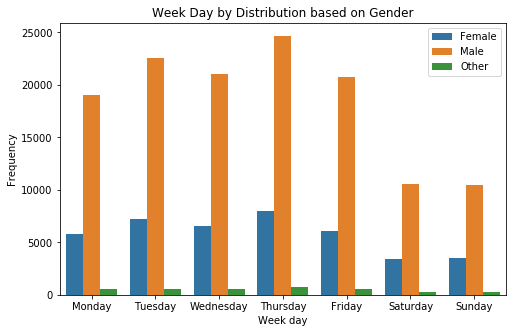

In [55]:
#relationship between day of week and user type
plt.figure(figsize = [8,5])
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data = df_clean , x = 'start_day_of_week', hue = 'member_gender', order = weekday)
plt.title('Week Day by Distribution based on Gender')
plt.xlabel('Week day')
plt.ylabel('Frequency')
plt.legend();


All riders irrespective of genders leaned towards higher ride activity on thursdays, compared to other days, with trips activity plateauing on saturday and sunday.


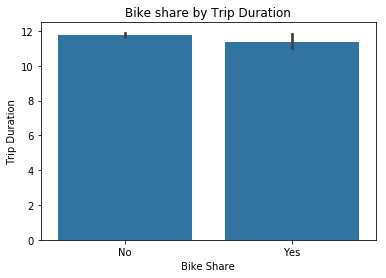

In [58]:
# relationship between trip duration in minutes and bike share
sb.barplot(data = df_clean , x = 'bike_share_for_all_trip', y = 'duration_min', color = basecolor)
plt.title('Bike share by Trip Duration')
plt.xlabel('Bike Share')
plt.ylabel('Trip Duration');


It can be seen that none shared rides were longer trips compared to shared trips

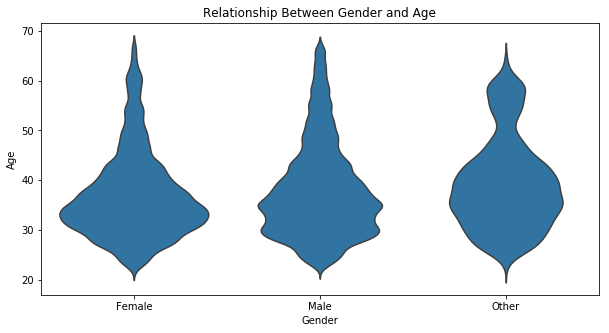

In [59]:

#relationship between gender and age
plt.figure(figsize=[10,5])
sb.violinplot(data = df_clean , x = 'member_gender', y = 'age', color = basecolor, inner = None)
plt.title('Relationship Between Gender and Age')
plt.xlabel('Gender')
plt.ylabel('Age');


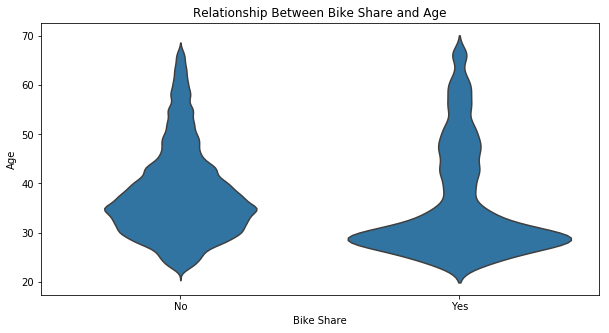

In [60]:
#relationship between share trip and age
plt.figure(figsize=[10,5])
sb.violinplot(data = df_clean , x = 'bike_share_for_all_trip', y = 'age', color = basecolor, inner = None)
plt.title('Relationship Between Bike Share and Age')
plt.xlabel('Bike Share')
plt.ylabel('Age');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

According to the graphics, even though men made up the majority of individuals who rode on the platform, women rode for the longest periods of time, while men rode for the shortest periods of time.

Investigating the association between genders, time of day, and day of the week revealed that there was a high in activity on the platform around 8 am and another peak by 5 pm, regardless of gender, supporting the idea that the peaks were caused by users leaving for or returning from work.

Peak hours were confirmed by looking into the link between user type and the time of day. More research will be necessary to determine why Thursdays continue to be the busiest day for all demographics; perhaps there is more traffic in the city on Thursdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


It's fascinating to see that younger users, those under the age of 30, favour sharing rides more than older users do.

## Multivariate Exploration



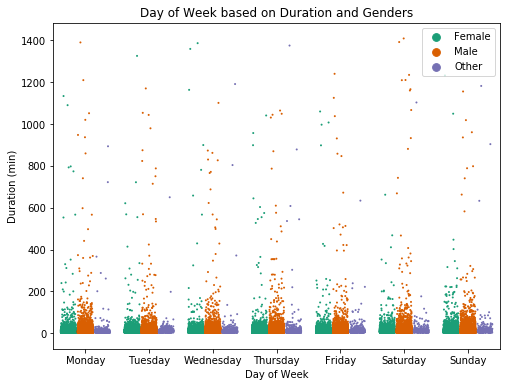

In [61]:
#relationship between day of the week , gender and duration in seconds
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df_clean, x = 'start_day_of_week', y = 'duration_min', hue = 'member_gender',
           palette = 'Dark2', jitter = 0.35, dodge = True, size = 2, order = weekday)
plt.title('Day of Week based on Duration and Genders')
plt.ylabel('Duration (min)')
plt.xlabel('Day of Week')
plt.legend()
ax.set_yticklabels([],minor = True);

Outliers bias the data visualisations somewhat.

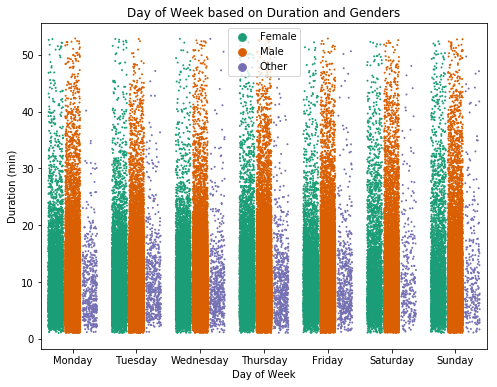

In [62]:
#striping off the outliers for a closer look at the relationship
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df_clean.query('duration_min<duration_min.quantile(0.99)') , x = 'start_day_of_week', y = 'duration_min', hue = 'member_gender',
           palette = 'Dark2', jitter = 0.35, dodge = True, size = 2, order = weekday)
plt.title('Day of Week based on Duration and Genders')
plt.ylabel('Duration (min)')
plt.xlabel('Day of Week')
plt.legend()
ax.set_yticklabels([],minor = True);



Male riders while accounting for the bulk of users on the platform also did longer trips compared to other genders, with the length of trips generally increasing as we get to saturday and sunday, a notion that also resonates with female riders

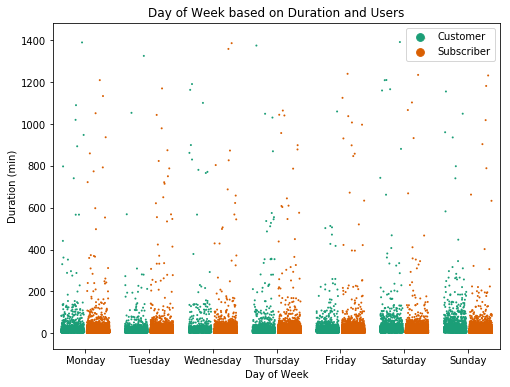

In [63]:
#relationship between day of the week , user and duration in seconds
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df_clean, x = 'start_day_of_week', y = 'duration_min', hue = 'user_type',
           palette = 'Dark2', dodge = True, jitter = 0.35, size = 2, order = weekday)
plt.title('Day of Week based on Duration and Users')
plt.ylabel('Duration (min)')
plt.xlabel('Day of Week')
plt.legend()
ax.set_yticklabels([],minor = True);

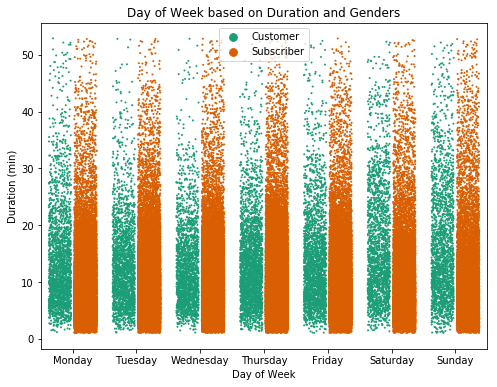

In [64]:
#striping off the outliers for a closer look at the relationship
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df_clean.query('duration_min<duration_min.quantile(0.99)') , x = 'start_day_of_week', y = 'duration_min', hue = 'user_type',
           palette = 'Dark2', jitter = 0.35, dodge = True, size = 2, order = weekday)
plt.title('Day of Week based on Duration and Genders')
plt.ylabel('Duration (min)')
plt.xlabel('Day of Week')
plt.legend()
ax.set_yticklabels([],minor = True);

The length of trips by users generally seem to increase as one approaches the weekends and this also rings through when checking the relationship on the basis of the users of the platform, it its for pronounced for casual users who generally took longer trips during the weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Comparatively to platform users, casual consumers took lengthier rides.

### Were there any interesting or surprising interactions between features?

In spite of the fact that riders made the fewest excursions on Saturday and Sunday, I noted that Sunday had the longest platform trips.

## Conclusions




According to the ride data visualisations, the busiest times are between the hours of 8 a.m. and 5 p.m., indicating that most riders use their bikes to get to and from work. with Thursday being a particularly busy day for the platform in the city.


The platform is mostly used by male motorcyclists.


The majority of users on the platform are subscribers, and they spread out the length of their journeys throughout the course of the week. with casual users experiencing a marginally discernible increase in platform usage during lengthy weekends excursions.


